Second dataset pour classification, optimisation des différents modéles (random forest, svm..). Introduction au bagging et boosting.

In [1]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

rcParams['figure.figsize'] = 8,6

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset name is `bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| housing | has housing loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [2]:
import pandas as pd

In [3]:
# create a dataframe with the dataset ./data/bank-full.csv
bank=pd.read_csv('../data/bank-full.csv',sep=';',na_values='unknown')
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


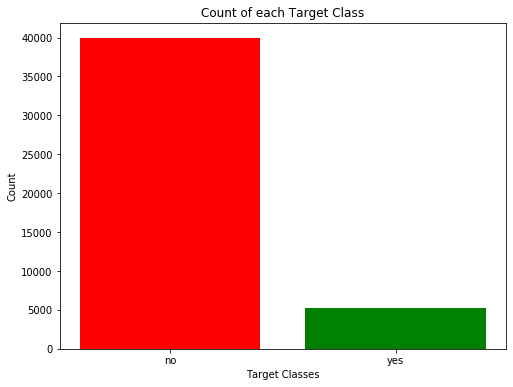

In [4]:
rcParams['figure.figsize'] = 8,6
plt.bar(bank.y.unique(), bank.y.value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class');

## Splitting

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

bank.y=LabelEncoder().fit_transform(bank.y)

Y=bank.pop('y')

#Important!!! Use the same parameters -> 20%, random seed generator=41.
X_train, X_test, Y_train, Y_test = train_test_split(bank, Y, test_size=0.2, random_state=41)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 23915 to 34752
Data columns (total 16 columns):
age          36168 non-null int64
job          35936 non-null object
marital      36168 non-null object
education    34703 non-null object
default      36168 non-null object
balance      36168 non-null int64
housing      36168 non-null object
loan         36168 non-null object
contact      25694 non-null object
day          36168 non-null int64
month        36168 non-null object
duration     36168 non-null int64
campaign     36168 non-null int64
pdays        36168 non-null int64
previous     36168 non-null int64
poutcome     6513 non-null object
dtypes: int64(7), object(9)
memory usage: 4.7+ MB


In [7]:
X_train.isna().sum()

age              0
job            232
marital          0
education     1465
default          0
balance          0
housing          0
loan             0
contact      10474
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     29655
dtype: int64

poutcome is definitely useless, contact probaably as weel, others are ok.

In [8]:
# X_train.drop(['poutcome','contact'],axis=1,inplace=True)

In [9]:
X_train.marital.unique()

array(['single', 'married', 'divorced'], dtype=object)

In [10]:
X_train.month.unique()

array(['aug', 'feb', 'jul', 'oct', 'may', 'jun', 'jan', 'apr', 'nov',
       'dec', 'mar', 'sep'], dtype=object)

In [11]:
X_train.campaign.unique()

array([ 4,  2,  1,  3,  6,  8, 21,  5, 10, 11, 24, 17, 20, 25, 12,  7,  9,
       19, 43, 16, 14, 18, 13, 38, 15, 26, 22, 32, 36, 50, 33, 29, 28, 23,
       35, 30, 27, 34, 63, 31, 44, 37, 41, 46, 58, 51])

In [12]:
X_train.previous.unique()

array([ 0,  3,  2,  4,  1,  6,  5, 17,  7, 13,  9,  8, 38, 10, 16, 12, 41,
       20, 11, 55, 21, 15, 14, 29, 23, 18, 58, 27, 19, 25, 40, 32, 24, 37,
       22, 30, 26, 35, 51])

In [13]:
X_train.previous.unique()

array([ 0,  3,  2,  4,  1,  6,  5, 17,  7, 13,  9,  8, 38, 10, 16, 12, 41,
       20, 11, 55, 21, 15, 14, 29, 23, 18, 58, 27, 19, 25, 40, 32, 24, 37,
       22, 30, 26, 35, 51])

In [14]:
X_train.loc[X_train.pdays==999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome


In [15]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
23915,33,management,single,tertiary,no,335,no,no,cellular,29,aug,130,4,-1,0,NaN
30500,31,entrepreneur,single,tertiary,no,544,no,yes,cellular,5,feb,401,2,8,3,other
13515,44,entrepreneur,married,tertiary,no,1808,yes,no,cellular,9,jul,127,1,-1,0,NaN
41825,47,technician,married,secondary,no,2149,yes,no,cellular,15,oct,241,1,183,2,success
18919,55,retired,married,secondary,no,0,no,no,cellular,4,aug,1110,1,-1,0,NaN


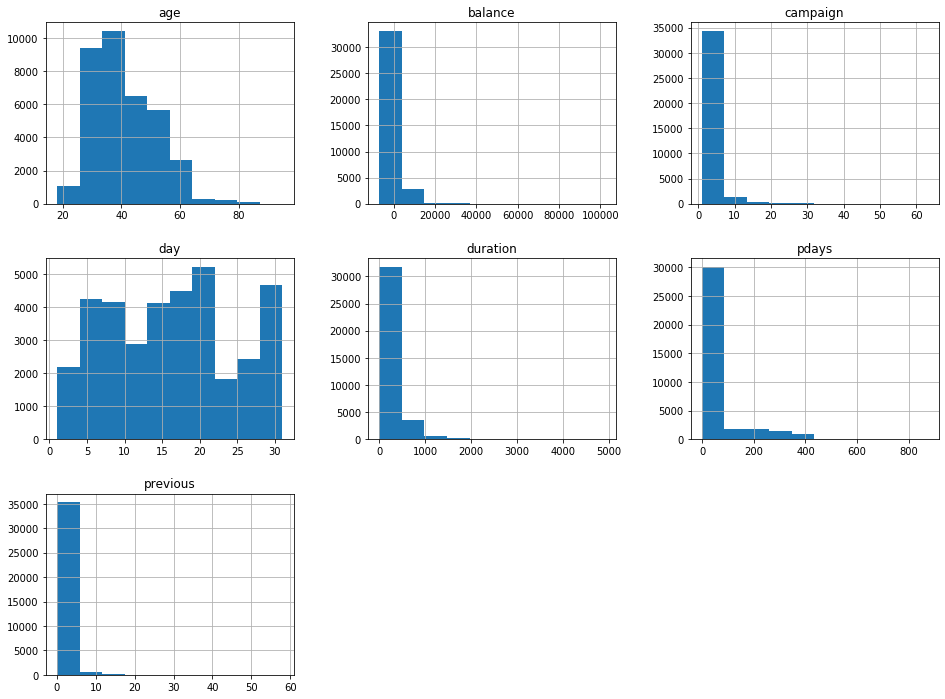

In [16]:
rcParams['figure.figsize'] = 16,12
plots = X_train.hist()

After a first exploration, categorical/ordinal features (10 columns) need to be encoded in order to become a valid input for the modeling phase.

The different encoders can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

(You can also use the function `get_dummies` of pandas for categorical features)

In [17]:
categorical_features = ['job','marital','education','month']
binary_features = ['default','housing','loan']
ordinal_features = ['age','balance','duration','pdays','previous','campaign']
all_features = categorical_features + binary_features + ordinal_features

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# class GetDummies(BaseEstimator, TransformerMixin):
#     def __init__(self,columns=''): # no *args or **kargs
#         self.columns=columns
#     def fit(self,X,Y=None):
#         return self
#     def transform(self,X):  
# #         X=pd.DataFrame(X,columns=self.columns)
#         OneHotEncoder(sparse=False)
#         return pd.get_dummies(X,columns=self.columns)
#
# class DataFramer(BaseEstimator, TransformerMixin):
#     def __init__(self,dataframe_original,binary=[],categorical=[],num=[]): # no *args or **kargs
#         self.dataframe_original=dataframe_original
#         self.binary=binary
#         self.categorical=categorical
#         self.num=num
#         self.columns_name=[]
#     def fit(self,X,Y=None):
#         Xc=self.dataframe_original[categorical_features].dropna()
#         self.columns_name.append(self.binary)
#         for column in Xc.columns:
#             col_temp=[]
#             for i in range(0,Xc[column].nunique()):
#                 if str(Xc[column].unique()[i]) != 'nan':
#                     col_temp.append(str(column)+'_'+str(Xc[column].unique()[i]))
#             self.columns_name.append(sorted(col_temp))
#         self.columns_name.append(self.num)
#         self.columns_name = [y for x in columns_name for y in x]
#         return self
#     def transform(self,X, **fit_params):
#         return pd.DataFrame(X,columns=self.columns_name)

class DataFramer(BaseEstimator, TransformerMixin):
    def __init__(self,dataframe_original,binary=[],categorical=[],num=[]): # no *args or **kargs
        self.dataframe_original=dataframe_original
        self.binary=binary
        self.categorical=categorical
        self.num=num
    def fit(self,X,Y=None):
        return self
    def transform(self,X):
        columns_name=[]
        Xc=self.dataframe_original[categorical_features].dropna()
        columns_name.append(self.binary)
        for column in Xc.columns:
            col_temp=[]
            for i in range(0,Xc[column].nunique()):
                if str(Xc[column].unique()[i]) != 'nan':
                    col_temp.append(str(column)+'_'+str(Xc[column].unique()[i]))
            columns_name.append(sorted(col_temp))
        columns_name.append(self.num)
        columns_name = [y for x in columns_name for y in x]
        return pd.DataFrame(X,columns=columns_name)
    
#Defining text pipeline: columns selecter, changing Nans by most frequent values, Encoding text values, standardizing
binary_pipeline = Pipeline([
    ('label',OrdinalEncoder()),
    ('std_scaler', StandardScaler())
])

text_pipeline = Pipeline([
('imputer',SimpleImputer(strategy="most_frequent")),
('cat_encoder',OneHotEncoder(sparse=False)),
('std_scaler', StandardScaler())
])

num_pipeline = Pipeline([
('imputer',SimpleImputer(strategy="most_frequent")),
('std_scaler', StandardScaler())
])

#Full pipeline!!!
full_pipeline = ColumnTransformer([
    ("bin", binary_pipeline, binary_features),
    ("cat", text_pipeline, categorical_features),
    ("num", num_pipeline, ordinal_features)
])

df_pipeline = Pipeline([
    ('data_framer',DataFramer(bank[all_features],binary=binary_features,categorical=categorical_features,num=ordinal_features))
])

In [19]:
class DataFramer(BaseEstimator, TransformerMixin):
    def __init__(self,dataframe_original,binary=[],categorical=[],num=[]): # no *args or **kargs
        self.dataframe_original=dataframe_original
        self.binary=binary
        self.categorical=categorical
        self.num=num
    def fit(self,X,Y=None):
        Xc=self.dataframe_original[categorical_features].dropna()
        self.columns_name.append(self.binary)
        for column in Xc.columns:
            col_temp=[]
            for i in range(0,Xc[column].nunique()):
                if str(Xc[column].unique()[i]) != 'nan':
                    col_temp.append(str(column)+'_'+str(Xc[column].unique()[i]))
            self.columns_name.append(sorted(col_temp))
        self.columns_name.append(self.num)
        self.columns_name = [y for x in columns_name for y in x]
        return self
    def transform(self,X):
        return pd.DataFrame(X,columns=self.columns_name)

In [20]:
X_train_prepared=full_pipeline.fit_transform(X_train)
X_train_prepared=df_pipeline.fit_transform(X_train_prepared)
X_train_prepared.head(2)

,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,age,balance,duration,pdays,previous,campaign
0,-0.135068,-1.122846,-0.434734,-0.359432,-0.538013,-0.185169,-0.166709,1.949195,-0.228854,-0.189674,...,-0.66236,-0.308497,-0.127326,-0.11237,-0.748053,-0.336533,-0.496675,-0.408660,-0.298956,0.403139
1,-0.135068,-1.122846,2.300257,-0.359432,-0.538013,5.400476,-0.166709,-0.513032,-0.228854,-0.189674,...,-0.66236,-0.308497,-0.127326,-0.11237,-0.937255,-0.267833,0.556676,-0.318138,1.286553,-0.246582


In [21]:
len(X_train_prepared.columns)

38

In [22]:
X_test_prepared=full_pipeline.transform(X_test)
X_test_prepared=df_pipeline.transform(X_test_prepared)
X_test_prepared.head(2)

,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,age,balance,duration,pdays,previous,campaign
0,-0.135068,0.890594,-0.434734,-0.359432,-0.538013,-0.185169,-0.166709,-0.513032,-0.228854,-0.189674,...,-0.662360,-0.308497,-0.127326,-0.11237,-1.694065,0.431980,-0.687134,-0.40866,-0.298956,-0.246582
1,-0.135068,0.890594,-0.434734,-0.359432,1.858692,-0.185169,-0.166709,-0.513032,-0.228854,-0.189674,...,1.509753,-0.308497,-0.127326,-0.11237,0.103358,-0.428899,0.039718,-0.40866,-0.298956,-0.571443


## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss.
2. A model, that performs well.


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Use a grid search and cross validation for creating a first decision tree classifier. 
    * Grid_search for a `min_samples_split` and the `max_depth` parameter. (don't forget that the tree will be displayed afterwards)
    * Visualize the created tree.

if you need you can see [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [80]:
#Grid search k and give its roc auc score:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


depth_range=range(1,10)
sample_splits_range=range(2,20)
param_grid =  {'max_depth': depth_range,'min_samples_split' :sample_splits_range }
T=DecisionTreeClassifier()

grid_search_T = GridSearchCV(T, param_grid, cv=10, scoring='f1',n_jobs=-1)
grid_search_T.fit(X_train_prepared, Y_train)

grid_results_T = pd.DataFrame(grid_search_T.cv_results_)
grid_results_T.sort_values(by=['rank_test_score'],inplace=True)
grid_results_T.head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
157,0.274071,0.008737,0.005122,0.000256,9,15,"{'max_depth': 9, 'min_samples_split': 15}",0.426087,0.471111,0.463068,0.467787,0.486563,0.452675,0.450785,0.497842,0.459459,0.418398,0.459377,0.023123,1
154,0.336325,0.034176,0.006389,0.002391,9,12,"{'max_depth': 9, 'min_samples_split': 12}",0.431259,0.471976,0.464589,0.466667,0.480905,0.452675,0.450142,0.497829,0.454545,0.420896,0.459148,0.021461,2
160,0.374488,0.045090,0.007199,0.001724,9,18,"{'max_depth': 9, 'min_samples_split': 18}",0.424419,0.472674,0.462644,0.459384,0.487324,0.450276,0.448571,0.500719,0.459215,0.421991,0.458722,0.023437,3
156,0.304984,0.042297,0.005450,0.000852,9,14,"{'max_depth': 9, 'min_samples_split': 14}",0.427746,0.474926,0.464589,0.460894,0.481586,0.450549,0.450142,0.495677,0.460150,0.420896,0.458716,0.021732,4
158,0.286903,0.039098,0.005444,0.000599,9,16,"{'max_depth': 9, 'min_samples_split': 16}",0.424419,0.473373,0.461980,0.462833,0.483734,0.449655,0.447932,0.500000,0.461538,0.418398,0.458386,0.023622,5


In [24]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

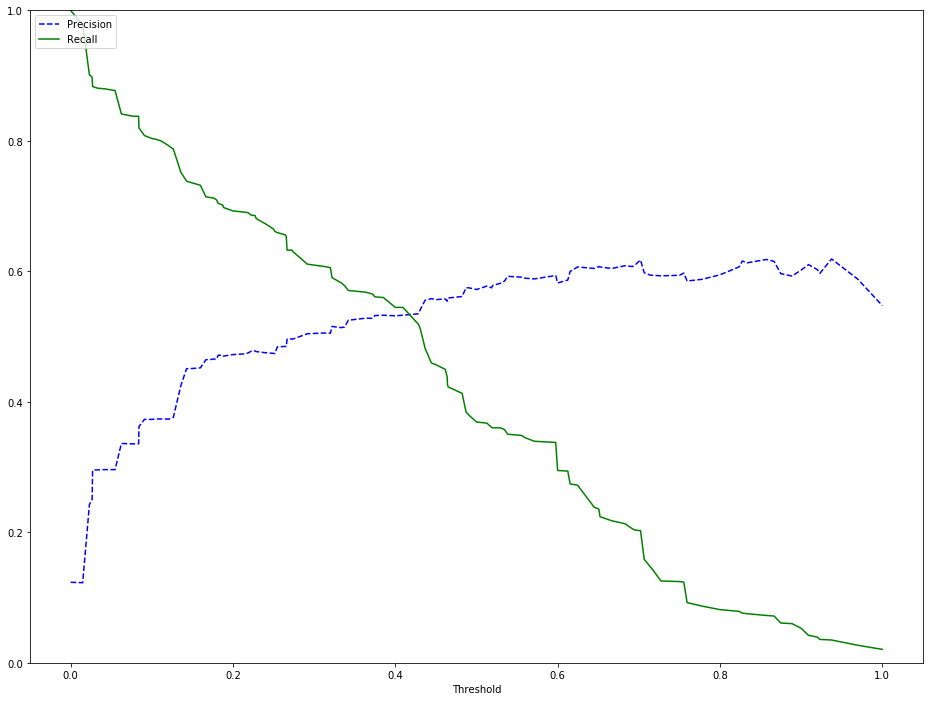

In [25]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


Y_test_cv_proba_dt=grid_search_T.best_estimator_.predict_proba(X_test_prepared)
precisions, recalls, thresholds = precision_recall_curve(Y_test,Y_test_cv_proba_dt[:,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


In [81]:
from sklearn.metrics import confusion_matrix,  precision_score, recall_score, accuracy_score, f1_score
from sklearn import tree

threshold = 0.5
Y_cv_pred_99recall = Y_test_cv_proba_dt[:,1] >= threshold
C1=confusion_matrix(Y_test,Y_cv_pred_99recall)
print('Confusion matrix:\n',C1)
P1=precision_score(Y_test,Y_cv_pred_99recall)
print('Precision score: ',P1)
R1=recall_score(Y_test,Y_cv_pred_99recall)
print('Recall score: ',R1)
A1=accuracy_score(Y_test,Y_cv_pred_99recall)
print('Accuracy score: ',A1)
F1=f1_score(Y_test,Y_cv_pred_99recall)
print('F1 score: ',F1)

Confusion matrix:
 [[7619  308]
 [ 704  412]]
Precision score:  0.5722222222222222
Recall score:  0.36917562724014336
Accuracy score:  0.8880902355413026
F1 score:  0.4488017429193899


In [82]:
results=pd.DataFrame(columns=['Models','Paramètres','F1','Accuracy','Recall','Precision'])
new_row={'Models':'DecisionTreeClassifier','Paramètres':"{'max_depth': 9, 'min_samples_split': 18}",'F1':F1,'Accuracy':A1,'Recall':R1,'Precision':P1}
results = results.append(new_row, ignore_index=True)


In [83]:
results

,Models,Paramètres,F1,Accuracy,Recall,Precision
0,DecisionTreeClassifier,"{'max_depth': 9, 'min_samples_split': 18}",0.448802,0.88809,0.369176,0.572222


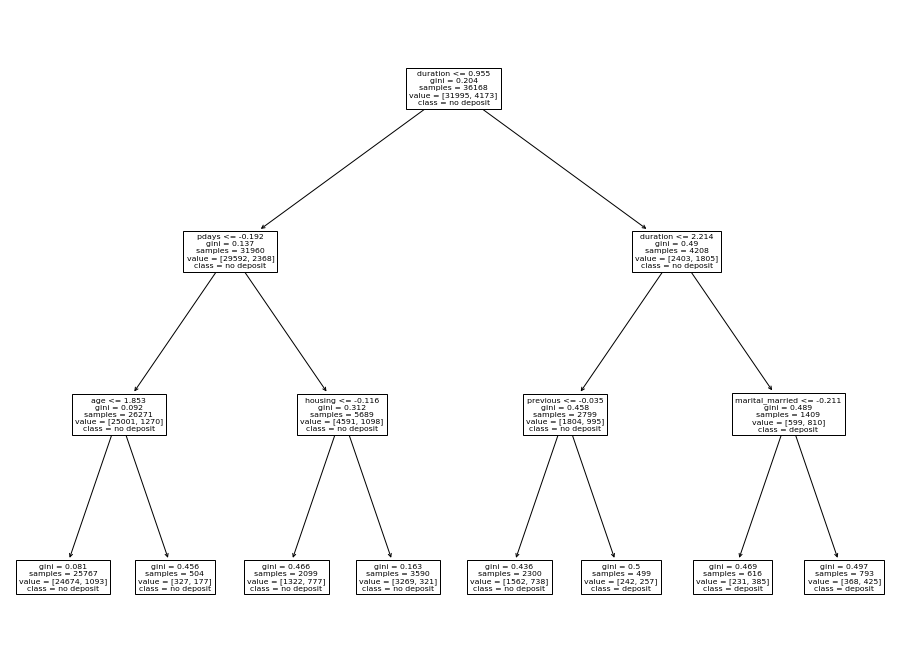

In [27]:
T=DecisionTreeClassifier(max_depth= 3, min_samples_split= 3)
T.fit(X_train_prepared,Y_train)

# rcParams['figure.figsize'] = 20,12
tree.plot_tree(T,feature_names=X_test_prepared.columns,class_names=['no deposit','deposit']);

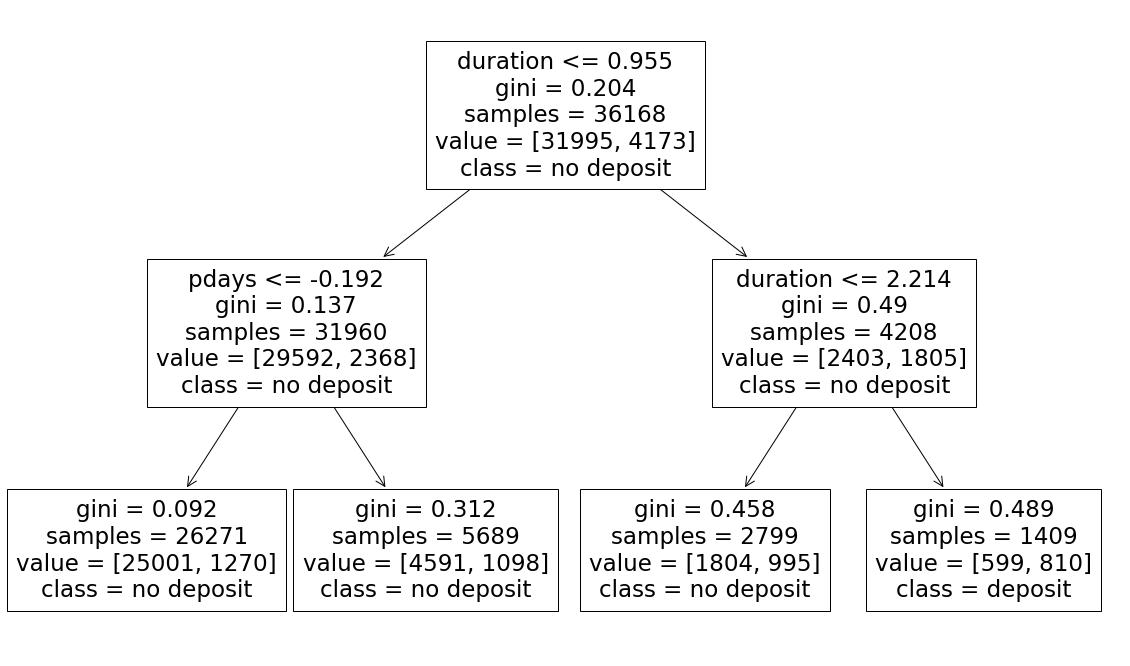

In [28]:
T=DecisionTreeClassifier(max_depth= 2, min_samples_split= 2)
T.fit(X_train_prepared,Y_train)

rcParams['figure.figsize'] = 20,12
tree.plot_tree(T,feature_names=X_test_prepared.columns,class_names=['no deposit','deposit']);

In [29]:
grid_search_T.best_params_

{'max_depth': 9, 'min_samples_split': 18}

Normally, before creating a model, one or more evaluation metrics should be chosen depending of the client problem.

* Choose two different metrics from this article : [model evaluation](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234).

* Prepare a scoring list for these metrics.

* Use the cross-validation method to evaluate these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

In [30]:
# Cross validation on Decision trees


In [31]:
grid_results_T.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
160,0.273697,0.009041,0.005161,0.000314,9,18,"{'max_depth': 9, 'min_samples_split': 18}",0.427326,0.470414,0.463727,0.468619,0.486563,0.448753,0.450142,0.500719,0.456193,0.422619,0.459508,0.022937,1
158,0.355540,0.054753,0.008268,0.004555,9,16,"{'max_depth': 9, 'min_samples_split': 16}",0.427326,0.473373,0.463068,0.464336,0.482370,0.451169,0.447932,0.499283,0.463855,0.418398,0.459111,0.022977,2
157,0.282294,0.015197,0.007878,0.005460,9,15,"{'max_depth': 9, 'min_samples_split': 15}",0.428986,0.472674,0.463068,0.462185,0.484419,0.454545,0.447932,0.497126,0.460150,0.419643,0.459073,0.022152,3
159,0.290741,0.017540,0.005196,0.000292,9,17,"{'max_depth': 9, 'min_samples_split': 17}",0.426705,0.470414,0.463068,0.465638,0.485876,0.449036,0.447932,0.500000,0.459215,0.421991,0.458987,0.022866,4
156,0.279373,0.010588,0.005184,0.000170,9,14,"{'max_depth': 9, 'min_samples_split': 14}",0.431259,0.475628,0.462411,0.465181,0.480905,0.450276,0.447932,0.496392,0.460843,0.419019,0.458985,0.021850,5


Now process the output of your cross-validation in order to know the diversity in performances and the average performance

In [32]:
cv_results=grid_results_T.loc[:,'split0_test_score':'split9_test_score']
cv_results=cv_results.iloc[1,:]
print(cv_results)
print(cv_results.values.mean())
print(cv_results.values.std())

split0_test_score    0.427326
split1_test_score    0.473373
split2_test_score    0.463068
split3_test_score    0.464336
split4_test_score    0.482370
split5_test_score    0.451169
split6_test_score    0.447932
split7_test_score    0.499283
split8_test_score    0.463855
split9_test_score    0.418398
Name: 158, dtype: float64
0.45911081456912617
0.022977225838105478


In [33]:
cv_results

split0_test_score    0.427326
split1_test_score    0.473373
split2_test_score    0.463068
split3_test_score    0.464336
split4_test_score    0.482370
split5_test_score    0.451169
split6_test_score    0.447932
split7_test_score    0.499283
split8_test_score    0.463855
split9_test_score    0.418398
Name: 158, dtype: float64

As you can see the output performance are quite heterogeneous!

Let's introduce the bagging method!

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

(if you need a reminder of bootstraping you can see [Wikipedia](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) )

#### Using Random Forest

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` parameter.

In [84]:
#Grid search k and give its roc auc score:
from sklearn.ensemble import RandomForestClassifier

depth_range=range(1,10)

estimator_range=range(1,15)
param_grid =  {'n_estimators': estimator_range}
R=RandomForestClassifier()

grid_search_R = GridSearchCV(R, param_grid, cv=10, scoring='f1',n_jobs=-1)
grid_search_R.fit(X_train_prepared, Y_train)

grid_results_R = pd.DataFrame(grid_search_R.cv_results_)
grid_results_R.sort_values(by=['rank_test_score'],inplace=True)
grid_results_R.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,0.668433,0.048377,0.019166,0.003348,9,{'n_estimators': 9},0.463977,0.460658,0.477901,0.452778,0.456091,0.426136,0.436519,0.460432,0.452555,0.461326,0.454837,0.013759,1
6,0.460448,0.053077,0.016419,0.004397,7,{'n_estimators': 7},0.476596,0.455696,0.444755,0.411348,0.491573,0.438672,0.446259,0.469930,0.439716,0.470263,0.454481,0.022011,2
10,0.806556,0.086187,0.025901,0.009367,11,{'n_estimators': 11},0.432836,0.432749,0.417266,0.457308,0.468085,0.467719,0.462857,0.465444,0.457726,0.460452,0.452244,0.016972,3
12,0.763199,0.028050,0.020840,0.000250,13,{'n_estimators': 13},0.439883,0.453638,0.427526,0.463483,0.474138,0.461980,0.453901,0.437681,0.435435,0.469444,0.451711,0.015022,4
2,0.196216,0.014991,0.009516,0.001120,3,{'n_estimators': 3},0.438144,0.468874,0.408964,0.447958,0.456908,0.404372,0.441701,0.456186,0.430556,0.451187,0.440485,0.019738,5
4,0.424056,0.072912,0.016478,0.009268,5,{'n_estimators': 5},0.442225,0.464135,0.421053,0.436813,0.430199,0.402219,0.418079,0.422695,0.467049,0.429549,0.433402,0.019146,6
11,0.760936,0.095258,0.021424,0.003709,12,{'n_estimators': 12},0.403727,0.432927,0.375587,0.427907,0.421705,0.410575,0.429851,0.414634,0.398744,0.424427,0.414008,0.016724,7
13,0.806676,0.024854,0.025394,0.010915,14,{'n_estimators': 14},0.401284,0.436641,0.385802,0.445122,0.428571,0.399386,0.429429,0.394904,0.394864,0.408408,0.412441,0.019595,8
0,0.073948,0.005178,0.006511,0.000377,1,{'n_estimators': 1},0.383495,0.400483,0.417874,0.387985,0.364532,0.429268,0.425684,0.417178,0.383863,0.406213,0.401657,0.020192,9
9,0.697858,0.042485,0.024532,0.009388,10,{'n_estimators': 10},0.398714,0.375405,0.387692,0.386688,0.425076,0.399381,0.370016,0.416667,0.408228,0.447806,0.401567,0.022516,10


Don't forget to cross validate the Random forest classifier with the metric used above for the Decision Trees.

In [35]:
cv_results=grid_results_R.loc[:,'split0_test_score':'split9_test_score']
cv_results=cv_results.iloc[1,:]
print(cv_results)
print(cv_results.values.mean())
print(cv_results.values.std())

split0_test_score    0.453488
split1_test_score    0.471098
split2_test_score    0.446746
split3_test_score    0.448326
split4_test_score    0.439437
split5_test_score    0.448179
split6_test_score    0.449502
split7_test_score    0.459736
split8_test_score    0.459302
split9_test_score    0.485356
Name: 10, dtype: float64
0.45611707114969224
0.012818015005969796


In [85]:
Y_test_cv_proba_R=grid_search_R.best_estimator_.predict_proba(X_test_prepared)
precisions, recalls, thresholds = precision_recall_curve(Y_test,Y_test_cv_proba_R[:,1])

threshold = 0.5
Y_cv_pred_99recall = Y_test_cv_proba_R[:,1] >= threshold
C1=confusion_matrix(Y_test,Y_cv_pred_99recall)
print('Confusion matrix:\n',C1)
P1=precision_score(Y_test,Y_cv_pred_99recall)
print('Precision score: ',P1)
R1=recall_score(Y_test,Y_cv_pred_99recall)
print('Recall score: ',R1)
A1=accuracy_score(Y_test,Y_cv_pred_99recall)
print('Accuracy score: ',A1)
F1=f1_score(Y_test,Y_cv_pred_99recall)
print('F1 score: ',F1)

Confusion matrix:
 [[7625  302]
 [ 680  436]]
Precision score:  0.5907859078590786
Recall score:  0.3906810035842294
Accuracy score:  0.8914077186774301
F1 score:  0.4703344120819849


In [86]:
new_row={'Models':'RandomForest','Paramètres':"{'n_estimators': 13}",'F1':F1,'Accuracy':A1,'Recall':R1,'Precision':P1}
results = results.append(new_row, ignore_index=True)


In [87]:
results

,Models,Paramètres,F1,Accuracy,Recall,Precision
0,DecisionTreeClassifier,"{'max_depth': 9, 'min_samples_split': 18}",0.448802,0.888090,0.369176,0.572222
1,RandomForest,{'n_estimators': 13},0.470334,0.891408,0.390681,0.590786


#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

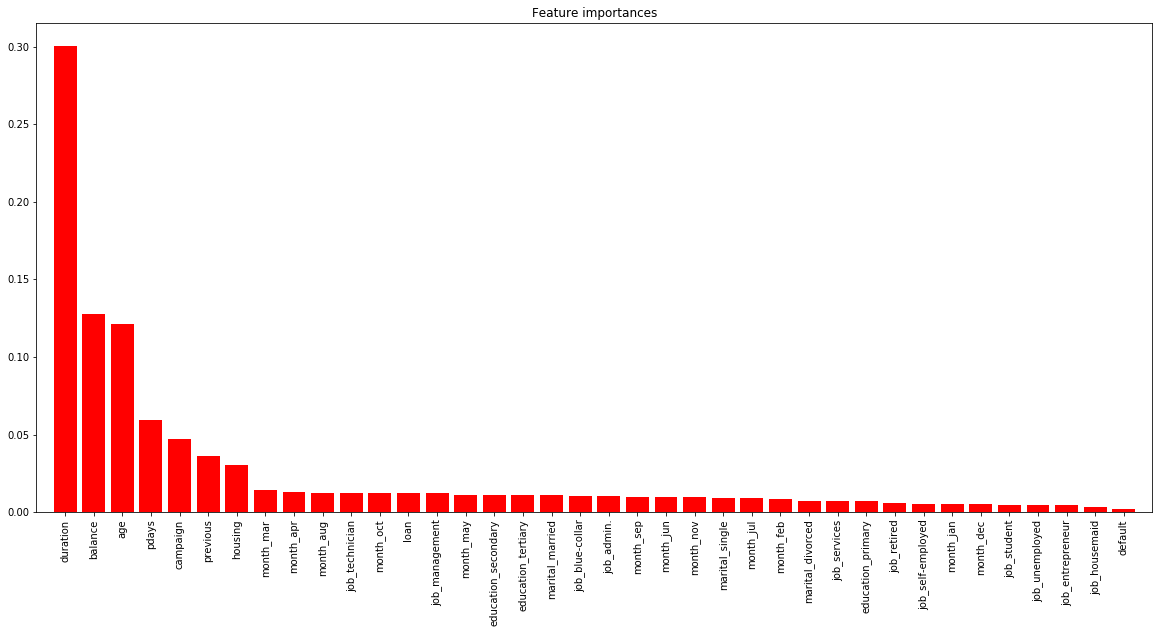

In [37]:
R=RandomForestClassifier(n_estimators=9)
R.fit(X_train_prepared,Y_train)
importances = R.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf.feature_importances_],
#              axis=0)
indices = np.argsort(importances)[::-1]
labels=[]
for i in range(0,len(indices)):
    labels.append(X_train_prepared.columns[indices[i]])

# Print the feature ranking
# print("Feature ranking:")
# for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure(figsize=(20, 9))
plt.title("Feature importances")
plt.bar(range(X_train_prepared.shape[1]), importances[indices],
       color="r",  align="center")
plt.xticks(range(X_train_prepared.shape[1]), labels,rotation=90)
plt.xlim([-1, X_train_prepared.shape[1]])
plt.show()

As we can see in the histogram  the most important feature is the `duration` column, the dataset description is on [here on uci](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). It also explains the good performances we had until here.

- Remove this feature and retrain the Decision Trees and Random Forest.

### retraining after removing duration

In [96]:
categorical_features = ['job','marital','education','month']
binary_features = ['default','housing','loan']
ordinal_features = ['age','balance','pdays','previous','campaign']

In [98]:

all_features = categorical_features + binary_features + ordinal_features

X_train_prepared2=full_pipeline.fit_transform(X_train)
X_train_prepared2=df_pipeline.fit_transform(X_train_prepared2)

X_test_prepared2=full_pipeline.transform(X_test)
X_test_prepared2=df_pipeline.transform(X_test_prepared2)

X_train_prepared2.head(2)
# X_train_prepared2.shape

,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_mar,month_may,month_nov,month_oct,month_sep,age,balance,pdays,previous,campaign
0,-0.135068,-1.122846,-0.434734,-0.359432,-0.538013,-0.185169,-0.166709,1.949195,-0.228854,-0.189674,...,-0.103181,-0.66236,-0.308497,-0.127326,-0.11237,-0.748053,-0.336533,-0.408660,-0.298956,0.403139
1,-0.135068,-1.122846,2.300257,-0.359432,-0.538013,5.400476,-0.166709,-0.513032,-0.228854,-0.189674,...,-0.103181,-0.66236,-0.308497,-0.127326,-0.11237,-0.937255,-0.267833,-0.318138,1.286553,-0.246582


In [99]:
X_test_prepared2.head(2)

,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_mar,month_may,month_nov,month_oct,month_sep,age,balance,pdays,previous,campaign
0,-0.135068,0.890594,-0.434734,-0.359432,-0.538013,-0.185169,-0.166709,-0.513032,-0.228854,-0.189674,...,-0.103181,-0.662360,-0.308497,-0.127326,-0.11237,-1.694065,0.431980,-0.40866,-0.298956,-0.246582
1,-0.135068,0.890594,-0.434734,-0.359432,1.858692,-0.185169,-0.166709,-0.513032,-0.228854,-0.189674,...,-0.103181,1.509753,-0.308497,-0.127326,-0.11237,0.103358,-0.428899,-0.40866,-0.298956,-0.571443


In [41]:
X_train_prepared2.columns

Index(['default', 'housing', 'loan', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'age', 'balance',
       'duration', 'pdays', 'previous', 'campaign'],
      dtype='object')

In [42]:
all_features

['job',
 'marital',
 'education',
 'month',
 'default',
 'housing',
 'loan',
 'age',
 'balance',
 'pdays',
 'previous',
 'campaign']

#### Decision tree

In [101]:
depth_range=range(1,10)
sample_splits_range=range(2,20)
param_grid =  {'max_depth': depth_range,'min_samples_split' :sample_splits_range }
T=DecisionTreeClassifier()

grid_search_T = GridSearchCV(T, param_grid, cv=10, scoring='f1',n_jobs=-1)
grid_search_T.fit(X_train_prepared2, Y_train)

grid_results_T = pd.DataFrame(grid_search_T.cv_results_)
grid_results_T.sort_values(by=['rank_test_score'],inplace=True)
grid_results_T.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
160,0.250017,0.005667,0.005130,0.000217,9,18,"{'max_depth': 9, 'min_samples_split': 18}",0.312500,0.278746,0.257143,0.274306,0.311864,0.302817,0.277087,0.262590,0.264085,0.267826,0.280896,0.019631,1
158,0.252195,0.003086,0.005053,0.000286,9,16,"{'max_depth': 9, 'min_samples_split': 16}",0.313589,0.287695,0.256684,0.275261,0.316327,0.294326,0.273050,0.262118,0.258407,0.268293,0.280575,0.020607,2
159,0.245758,0.002385,0.005656,0.001657,9,17,"{'max_depth': 9, 'min_samples_split': 17}",0.307692,0.284722,0.261181,0.275261,0.312394,0.296820,0.276106,0.262118,0.258407,0.270833,0.280554,0.018385,3
150,0.248232,0.003103,0.005215,0.000252,9,8,"{'max_depth': 9, 'min_samples_split': 8}",0.301226,0.296041,0.260714,0.281739,0.313659,0.295255,0.274021,0.259459,0.251773,0.267826,0.280171,0.019624,4
145,0.248974,0.002899,0.005302,0.000441,9,3,"{'max_depth': 9, 'min_samples_split': 3}",0.306620,0.284722,0.264758,0.271777,0.318792,0.291740,0.283186,0.258993,0.252220,0.266898,0.279971,0.020170,5
155,0.251175,0.003949,0.005164,0.000217,9,13,"{'max_depth': 9, 'min_samples_split': 13}",0.306620,0.285217,0.259786,0.273205,0.310811,0.298770,0.273535,0.259928,0.258407,0.273356,0.279964,0.018567,6
154,0.248359,0.003200,0.005205,0.000245,9,12,"{'max_depth': 9, 'min_samples_split': 12}",0.304196,0.284229,0.256228,0.272251,0.313659,0.293805,0.279646,0.259928,0.258407,0.273830,0.279618,0.018595,7
156,0.247482,0.005031,0.005021,0.000135,9,14,"{'max_depth': 9, 'min_samples_split': 14}",0.307155,0.284722,0.256684,0.274783,0.310811,0.294326,0.279152,0.259459,0.258407,0.270364,0.279586,0.018615,8
157,0.248247,0.004787,0.005171,0.000238,9,15,"{'max_depth': 9, 'min_samples_split': 15}",0.307692,0.282723,0.256684,0.274783,0.310811,0.296820,0.274021,0.262590,0.258407,0.270364,0.279489,0.018635,9
161,0.242922,0.005575,0.004809,0.000169,9,19,"{'max_depth': 9, 'min_samples_split': 19}",0.314136,0.277680,0.255856,0.265734,0.312394,0.299824,0.270463,0.262590,0.264085,0.267826,0.279059,0.020460,10


In [106]:
Y_test_cv_proba_T=grid_search_T.best_estimator_.predict_proba(X_test_prepared2)
precisions, recalls, thresholds = precision_recall_curve(Y_test,Y_test_cv_proba_T[:,1])

threshold = 0.5
Y_cv_pred_99recall = Y_test_cv_proba_T[:,1] >= threshold
C1=confusion_matrix(Y_test,Y_cv_pred_99recall)
print('Confusion matrix:\n',C1)
P1=precision_score(Y_test,Y_cv_pred_99recall)
print('Precision score: ',P1)
R1=recall_score(Y_test,Y_cv_pred_99recall)
print('Recall score: ',R1)
A1=accuracy_score(Y_test,Y_cv_pred_99recall)
print('Accuracy score: ',A1)
F1=f1_score(Y_test,Y_cv_pred_99recall)
print('F1 score: ',F1)

new_row={'Models':'DecisionTree wo duration','Paramètres':"{'max_depth': 9, 'min_samples_split': 15}",'F1':F1,'Accuracy':A1,'Recall':R1,'Precision':P1}
results = results.append(new_row, ignore_index=True)

Confusion matrix:
 [[7706  221]
 [ 891  225]]
Precision score:  0.5044843049327354
Recall score:  0.20161290322580644
Accuracy score:  0.877031958420878
F1 score:  0.2880921895006402


In [113]:
results

,Models,Paramètres,F1,Accuracy,Recall,Precision
0,DecisionTreeClassifier,"{'max_depth': 9, 'min_samples_split': 18}",0.448802,0.888090,0.369176,0.572222
1,RandomForest,{'n_estimators': 13},0.470334,0.891408,0.390681,0.590786
5,DecisionTree wo duration,"{'max_depth': 9, 'min_samples_split': 15}",0.288092,0.877032,0.201613,0.504484
6,XGBClassifier,{'n_estimators': 100},0.212251,0.877695,0.133513,0.517361


#### RandomForest 

In [117]:
#Grid search k and give its roc auc score:
from sklearn.ensemble import RandomForestClassifier

depth_range=range(1,10)

estimator_range=range(1,15)
param_grid =  {'n_estimators': estimator_range}
R=RandomForestClassifier()

grid_search_R = GridSearchCV(R, param_grid, cv=10, scoring='f1',n_jobs=-1)
grid_search_R.fit(X_train_prepared2, Y_train)

grid_results_R = pd.DataFrame(grid_search_R.cv_results_)
grid_results_R.sort_values(by=['rank_test_score'],inplace=True)
grid_results_R.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.195599,0.010920,0.009562,0.000144,3,{'n_estimators': 3},0.285319,0.276836,0.278665,0.297872,0.270950,0.278736,0.284495,0.292264,0.258544,0.296296,0.281998,0.011400,1
8,0.541536,0.016051,0.018485,0.000405,9,{'n_estimators': 9},0.265340,0.281646,0.254967,0.313600,0.299363,0.271523,0.287561,0.290271,0.307448,0.234528,0.280625,0.023238,2
6,0.529402,0.060171,0.020179,0.002759,7,{'n_estimators': 7},0.278041,0.263666,0.242326,0.282540,0.292528,0.272436,0.239203,0.308917,0.287975,0.295238,0.276287,0.021375,3
10,0.794263,0.059372,0.031783,0.008769,11,{'n_estimators': 11},0.262895,0.268212,0.252492,0.302632,0.314607,0.275527,0.256410,0.289517,0.253756,0.284779,0.276083,0.020306,4
12,0.894614,0.102735,0.025059,0.001285,13,{'n_estimators': 13},0.264214,0.282468,0.258824,0.282010,0.250825,0.285714,0.266667,0.265060,0.264407,0.282392,0.270258,0.011368,5
4,0.416980,0.047957,0.016901,0.005099,5,{'n_estimators': 5},0.263492,0.284418,0.228571,0.288820,0.267884,0.277419,0.257962,0.255319,0.272025,0.270431,0.266634,0.016223,6
0,0.109102,0.021268,0.011217,0.004214,1,{'n_estimators': 1},0.270205,0.264242,0.270073,0.268208,0.257075,0.274775,0.265031,0.263473,0.266355,0.225962,0.262540,0.012999,7
11,0.958508,0.094714,0.037665,0.007286,12,{'n_estimators': 12},0.250883,0.231047,0.215548,0.277592,0.245675,0.230347,0.235294,0.246479,0.254867,0.250871,0.243860,0.016092,8
13,0.842383,0.047441,0.025777,0.000841,14,{'n_estimators': 14},0.224956,0.270463,0.247350,0.261484,0.223404,0.236162,0.238267,0.229682,0.253119,0.225000,0.240989,0.015674,9
9,0.636415,0.035777,0.020462,0.001349,10,{'n_estimators': 10},0.254025,0.234875,0.224231,0.235088,0.234694,0.242857,0.240708,0.246869,0.243386,0.232143,0.238888,0.008004,10


In [132]:
Y_test_cv_proba_T=grid_search_R.best_estimator_.predict_proba(X_test_prepared2)
precisions, recalls, thresholds = precision_recall_curve(Y_test,Y_test_cv_proba_R[:,1])

threshold = 0.5
Y_cv_pred_99recall = Y_test_cv_proba_T[:,1] >= threshold
C1=confusion_matrix(Y_test,Y_cv_pred_99recall)
print('Confusion matrix:\n',C1)
P1=precision_score(Y_test,Y_cv_pred_99recall)
print('Precision score: ',P1)
R1=recall_score(Y_test,Y_cv_pred_99recall)
print('Recall score: ',R1)
A1=accuracy_score(Y_test,Y_cv_pred_99recall)
print('Accuracy score: ',A1)
F1=f1_score(Y_test,Y_cv_pred_99recall)
print('F1 score: ',F1)

new_row={'Models':'RandomForest wo duration','Paramètres':"{'n_estimators': 3}",'F1':F1,'Accuracy':A1,'Recall':R1,'Precision':P1}
results = results.append(new_row, ignore_index=True)

Confusion matrix:
 [[7451  476]
 [ 836  280]]
Precision score:  0.37037037037037035
Recall score:  0.25089605734767023
Accuracy score:  0.8549154041800288
F1 score:  0.2991452991452991


In [141]:
results

,Models,Paramètres,F1,Accuracy,Recall,Precision
0,DecisionTreeClassifier,"{'max_depth': 9, 'min_samples_split': 18}",0.448802,0.88809,0.369176,0.572222
1,RandomForest,{'n_estimators': 13},0.470334,0.891408,0.390681,0.590786
2,DecisionTree wo duration,"{'max_depth': 9, 'min_samples_split': 15}",0.288092,0.877032,0.201613,0.504484
3,XGBClassifier,{'n_estimators': 100},0.212251,0.877695,0.133513,0.517361
5,RandomForest wo duration,{'n_estimators': 3},0.299145,0.854915,0.250896,0.37037


### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install `xgboost`

*Read the articles/books chapters in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

you can find a small code example for integrating `XGBoost` with  the `sklearn` tools [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [44]:
import xgboost as xgb

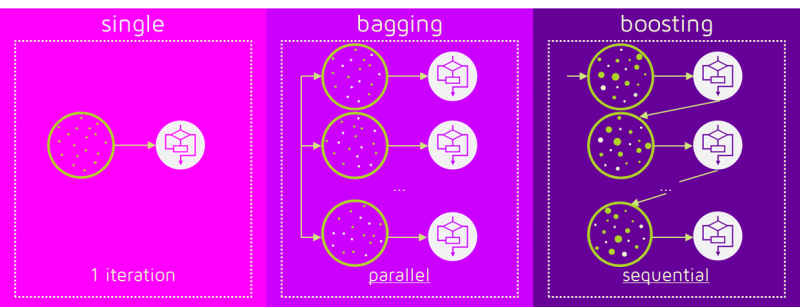

https://towardsdatascience.com/decision-tree-ensembles-bagging-and-boosting-266a8ba60fd9 <br>
https://www.statisticshowto.datasciencecentral.com/sampling-with-replacement-without/

Let's build a new model than before with a grid search on the parameter `n_estimators`

In [103]:
# model building and evaluation
param_grid = {'n_estimators': [10, 50, 100]}

model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10,n_jobs=-1)

# fit grid
grid_search.fit(X_train_prepared2, Y_train)
print('Best k:',grid_search.best_params_)
print('Best ROC AUC', grid_search.best_score_)
Y_train_pred = grid_search.best_estimator_.predict(X_test_prepared2)
Y_test_pred = grid_search.best_estimator_.predict(X_test_prepared2)

Best k: {'n_estimators': 100}
Best ROC AUC 0.887911994061964


In [46]:
print('Test ROC AUC:', metrics.roc_auc_score(Y_test, Y_test_pred))
print('\nRecall score (test)', metrics.recall_score(Y_test, Y_test_pred))
print('Precision score (test)', metrics.precision_score(Y_test, Y_test_pred))
print('Accuracy score (test)', metrics.accuracy_score(Y_test, Y_test_pred))
print('F1 score (test)', metrics.f1_score(Y_test, Y_test_pred))

Test ROC AUC: 0.6547583844154975

Recall score (test) 0.33512544802867383
Precision score (test) 0.6481802426343154
Accuracy score (test) 0.8954992812119872
F1 score (test) 0.4418192557590077


In [104]:
Y_test_cv_proba=grid_search.best_estimator_.predict_proba(X_test_prepared2)
precisions, recalls, thresholds = precision_recall_curve(Y_test,Y_test_cv_proba[:,1])

threshold = 0.5
Y_cv_pred_99recall = Y_test_cv_proba[:,1] >= threshold
C1=confusion_matrix(Y_test,Y_cv_pred_99recall)
print('Confusion matrix:\n',C1)
P1=precision_score(Y_test,Y_cv_pred_99recall)
print('Precision score: ',P1)
R1=recall_score(Y_test,Y_cv_pred_99recall)
print('Recall score: ',R1)
A1=accuracy_score(Y_test,Y_cv_pred_99recall)
print('Accuracy score: ',A1)
F1=f1_score(Y_test,Y_cv_pred_99recall)
print('F1 score: ',F1)

new_row={'Models':'XGBClassifier','Paramètres':"{'n_estimators': 100}",'F1':F1,'Accuracy':A1,'Recall':R1,'Precision':P1}
results = results.append(new_row, ignore_index=True)

Confusion matrix:
 [[7788  139]
 [ 967  149]]
Precision score:  0.5173611111111112
Recall score:  0.1335125448028674
Accuracy score:  0.8776954550481035
F1 score:  0.2122507122507123


In [142]:
results

,Models,Paramètres,F1,Accuracy,Recall,Precision
0,DecisionTreeClassifier,"{'max_depth': 9, 'min_samples_split': 18}",0.448802,0.88809,0.369176,0.572222
1,RandomForest,{'n_estimators': 13},0.470334,0.891408,0.390681,0.590786
2,DecisionTree wo duration,"{'max_depth': 9, 'min_samples_split': 15}",0.288092,0.877032,0.201613,0.504484
3,XGBClassifier,{'n_estimators': 100},0.212251,0.877695,0.133513,0.517361
5,RandomForest wo duration,{'n_estimators': 3},0.299145,0.854915,0.250896,0.37037


## Let's Conclude

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why?

you can add your models result visualization in this cells if it helps you explaining your conclusions.

https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

Bagging is taking random trees by selecting random features with replacement. Each trees are trained, with possibily different depths. A vote is then carried out to determine what is the majority of trees thinking for a class. This is supposed to be more robust than decision trees. Trees are processed in parallel gor bagging.<br><br>
It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach. <br><br>

Boosting is similar but in a sequential way. In Boosting algorithms each classifier is trained on data, taking into account the previous classifiers’ success. After each training step, the weights are redistributed. Misclassified data increases its weights to emphasise the most difficult cases. In this way, subsequent learners will focus on them during their training. As for classification, the algorithm allocates weights to each resulting model. A learner with good a classification result on the training data will be assigned a higher weight than a poor one.<br><br>

Bagging and Boosting decrease the variance of your single estimate as they combine several estimates from different models. So the result may be a model with higher stability.

If the problem is that the single model gets a very low performance, Bagging will rarely get a better bias. However, Boosting could generate a combined model with lower errors as it optimises the advantages and reduces pitfalls of the single model.

By contrast, if the difficulty of the single model is over-fitting, then Bagging is the best option. Boosting for its part doesn’t help to avoid over-fitting; in fact, this technique is faced with this problem itself. For this reason, Bagging is effective more often than Boosting.